In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
tf.__version__

'1.15.3'

In [4]:
keras.__version__

'2.2.4-tf'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [10]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
X_test = X_test / 255.0

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
class_names[y_train[0]]

'Coat'

In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
Total params: 275,700
Trainable params: 275,700
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.layers

In [19]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [20]:
model.get_layer('dense_3') is hidden1

True

In [22]:
weights, biases = hidden1.get_weights()

In [23]:
print(weights.shape)
weights

(784, 300)


array([[ 0.01840017, -0.00019916,  0.06903419, ...,  0.04806755,
         0.0584942 ,  0.07370675],
       [ 0.01665808,  0.05003627, -0.0070301 , ..., -0.06973889,
        -0.0093608 , -0.05402963],
       [-0.03182061, -0.01628963, -0.01940452, ...,  0.06453384,
         0.02581715, -0.04594453],
       ...,
       [ 0.00707339,  0.0234272 ,  0.00575881, ...,  0.02438813,
        -0.00258632,  0.06611507],
       [-0.0602559 ,  0.06442571,  0.04805584, ..., -0.04843841,
        -0.00190339, -0.04040103],
       [ 0.03039232, -0.06221407, -0.05781554, ..., -0.05546425,
         0.05388018,  0.00060965]], dtype=float32)

In [25]:
print(biases.shape)
biases

(300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 109us/sample - loss: 0.8483 - acc: 0.7318 - val_loss: 0.5337 - val_acc: 0.8194
Epoch 2/30
55000/55000 [==============================] - 6s 105us/sample - loss: 0.5123 - acc: 0.8211 - val_loss: 0.4983 - val_acc: 0.8200
Epoch 3/30
55000/55000 [==============================] - 6s 106us/sample - loss: 0.4599 - acc: 0.8389 - val_loss: 0.4521 - val_acc: 0.8414
Epoch 4/30
55000/55000 [==============================] - 6s 101us/sample - loss: 0.4314 - acc: 0.8475 - val_loss: 0.4548 - val_acc: 0.8344
Epoch 5/30
55000/55000 [==============================] - 6s 109us/sample - loss: 0.4091 - acc: 0.8559 - val_loss: 0.4210 - val_acc: 0.8548
Epoch 6/30
55000/55000 [==============================] - 6s 118us/sample - loss: 0.3923 - acc: 0.8616 - val_loss: 0.3819 - val_acc: 0.8696
Epoch 7/30
55000/55000 [==============================] - 6s 105us/sample - loss: 0.3781 - acc: 0.8669 - val_lo

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

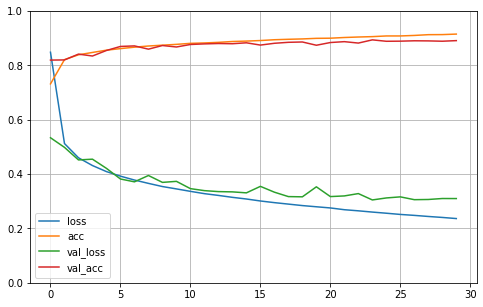

In [35]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [37]:
print(model.evaluate(X_test, y_test))

X_new = X_test[:3]
y_proba = model.predict(X_new)

y_proba.round(2)

10000/10000 [==============================] - 1s 52us/sample - loss: 0.3457 - acc: 0.8778
[0.34565086470246315, 0.8778]


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98, 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0. 

In [38]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [39]:
import numpy as np

In [40]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [41]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)